DEFAULT OF CREDIT CARD CLIENTS
===
**Sergio Vélez Ibarra**   
Especialización en Analítica   
Universidad Nacional de Colombia, Sede Medellín   
Facultad de Minas   
Medellín, Colombia.

# 1. Definición del Problema Real

Se desea determinar si un cliente incumple o no con el pago de su tarjeta de crédito en el próximo mes que le correspondería, a partir de la información de pagos realizados en meses anteriores y movimientos de su tarjeta. Se cuenta con 30,000 registros.

# 2. Definición del problema en términos de los datos

Se tiene la base de datos de 30,000 registros de clientes con el resultado que indica si incumplió o no con el pago de su tarjeta de crédito. Cada registro contiene 24 variables,
las cuales corresponden a información sociodemográfica del cliente como sexo, nivel educativo, estado civil y edad y a información relacionada con la tarjeta de crédito que tiene con el banco,
movimientos de la tarjeta en los últimos seis meses.

* LIMIT_BAL	Monto del crédito otorgado (NT dólar): incluye tanto el crédito al consumo individual como el crédito familiar (suplementario).
* SEX	Sexo (1 = hombre, 2 = mujer).
* EDUCATION	Educación (1 = escuela de postgrado, 2 = universidad, 3 = escuela secundaria, 4 = otros).
* MARRIAGE	estado civil (1 = casado, 2 = soltero, 3 = otros).
* AGE	edad (año).
* PAY_0	Estado de pago en septiembre de 2005
* PAY_2	Estado de pago en agosto de 2005
* PAY_3	Estado de pago en julio de 2005
* PAY_4	Estado de pago en junio de 2005
* PAY_5	Estado de pago en mayo de 2005
* PAY_6	Estado de pago en abril de 2005
* BILL_AMT1	Cantidad de estado de cuenta en septiembre de 2005
* BILL_AMT2	Cantidad de estado de cuenta en agosto de 2005
* BILL_AMT3	Cantidad de estado de cuenta en julio de 2005
* BILL_AMT4	Cantidad de estado de cuenta en junio de 2005
* BILL_AMT5	Cantidad de estado de cuenta en mayo de 2005
* BILL_AMT6	Cantidad de estado de cuenta en abril de 2005
* PAY_AMT1	Monto pagado en septiembre de 2005
* PAY_AMT2	Monto pagado en agosto de 2005
* PAY_AMT3	Monto pagado en julio de 2005
* PAY_AMT4	Monto pagado en junio de 2005
* PAY_AMT5	Monto pagado en mayo de 2005
* PAY_AMT6	Monto pagado en abril de 2005
* default payment (1: Incumple, 0: No Incumple)


En términos de los datos, se desea pronosticar si un cliente incumplirá en el pago de su tarjeta de crédito a partir de las 24 variables.

Fuente de los datos: https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients






# Exploración

In [42]:
data <- read.csv("C:/Users/SVELEZIBARRA/Documents/ESP_ANAL/CONTENIDO/2/trabajo ADM/default_of_credit_card.csv",sep=";",stringsAsFactors = FALSE)
##
## Verificación de los datos cargados
## La columna diagnosis corresponde al dianóstico.
##
str(data)

'data.frame':	30000 obs. of  24 variables:
 $ LIMIT_BAL                 : int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX                       : int  2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION                 : int  2 2 2 2 2 1 1 2 3 3 ...
 $ MARRIAGE                  : int  1 2 2 1 1 2 2 2 1 2 ...
 $ AGE                       : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0                     : int  2 -1 0 0 -1 0 0 0 0 -2 ...
 $ PAY_2                     : int  2 2 0 0 0 0 0 -1 0 -2 ...
 $ PAY_3                     : int  -1 0 0 0 -1 0 0 -1 2 -2 ...
 $ PAY_4                     : int  -1 0 0 0 0 0 0 0 0 -2 ...
 $ PAY_5                     : int  -2 0 0 0 0 0 0 0 0 -1 ...
 $ PAY_6                     : int  -2 2 0 0 0 0 0 -1 0 -1 ...
 $ BILL_AMT1                 : int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2                 : int  3102 1725 14027 48233 5670 57069 412023 380 14096 0 ...
 $ BILL_AMT3                 : int  689 2

In [43]:
##
## Extrae la columna diagnosis que es la 
## variable de salida (columna 1)
##
y = data$default.payment.next.month
data$SEX=factor(data$SEX)
data$EDUCATION=factor(data$EDUCATION)
data$MARRIAGE=factor(data$MARRIAGE)
data$PAY_0=factor(data$PAY_0)
data$PAY_2=factor(data$PAY_2)
data$PAY_3=factor(data$PAY_3)
data$PAY_4=factor(data$PAY_4)
data$PAY_5=factor(data$PAY_5)
data$PAY_6=factor(data$PAY_6)


In [44]:
table(y)

y
    0     1 
23364  6636 

In [45]:
##
## Elimina las columnas 0 (id) y 1 (diagnosis)
## de los datos originales
##
X = data[,1:ncol(data)-1]
head(X)

LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
50000,1,1,2,37,0,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800


In [46]:
##
## Se convierte la columna default_payment de character a factor.
##
y <- factor(y,
            levels = c("0", "1"),              # Los números 0 y 1 se convierten a factores
            labels = c("No Incumple", "Incumple")) # se dan nuevos nombres a los factores


In [47]:
head(y)

[1] Incumple    Incumple    No Incumple No Incumple No Incumple No Incumple
Levels: No Incumple Incumple

In [48]:
table(y)

y
No Incumple    Incumple 
      23364        6636 

In [49]:
##
## Se convierte el conteo en probabilidades.
##
round(prop.table(table(y)) * 100, digits = 1)

y
No Incumple    Incumple 
       77.9        22.1 

# 3. Técnicas a considerar:

Se ajustarán 4 modelos de clasificación, siguiendo la metodología CRISP-DM. Estos son:

* Vecinos más cercanos
* Naive Bayes
* Árbol de Decisión
* OneR

# 3.1 Vecinos más cercanos

# Preparación de los datos

In [50]:
##
## se examina el rango de las variables
##
summary(X)

   LIMIT_BAL       SEX       EDUCATION MARRIAGE       AGE       
 Min.   :  10000   1:11888   0:   14   0:   54   Min.   :21.00  
 1st Qu.:  50000   2:18112   1:10585   1:13659   1st Qu.:28.00  
 Median : 140000             2:14030   2:15964   Median :34.00  
 Mean   : 167484             3: 4917   3:  323   Mean   :35.49  
 3rd Qu.: 240000             4:  123             3rd Qu.:41.00  
 Max.   :1000000             5:  280             Max.   :79.00  
                             6:   51                            
     PAY_0           PAY_2           PAY_3           PAY_4      
 0      :14737   0      :15730   0      :15764   0      :16455  
 -1     : 5686   -1     : 6050   -1     : 5938   -1     : 5687  
 1      : 3688   2      : 3927   -2     : 4085   -2     : 4348  
 -2     : 2759   -2     : 3782   2      : 3819   2      : 3159  
 2      : 2667   3      :  326   3      :  240   3      :  180  
 3      :  322   4      :   99   4      :   76   4      :   69  
 (Other):  141   (Other):

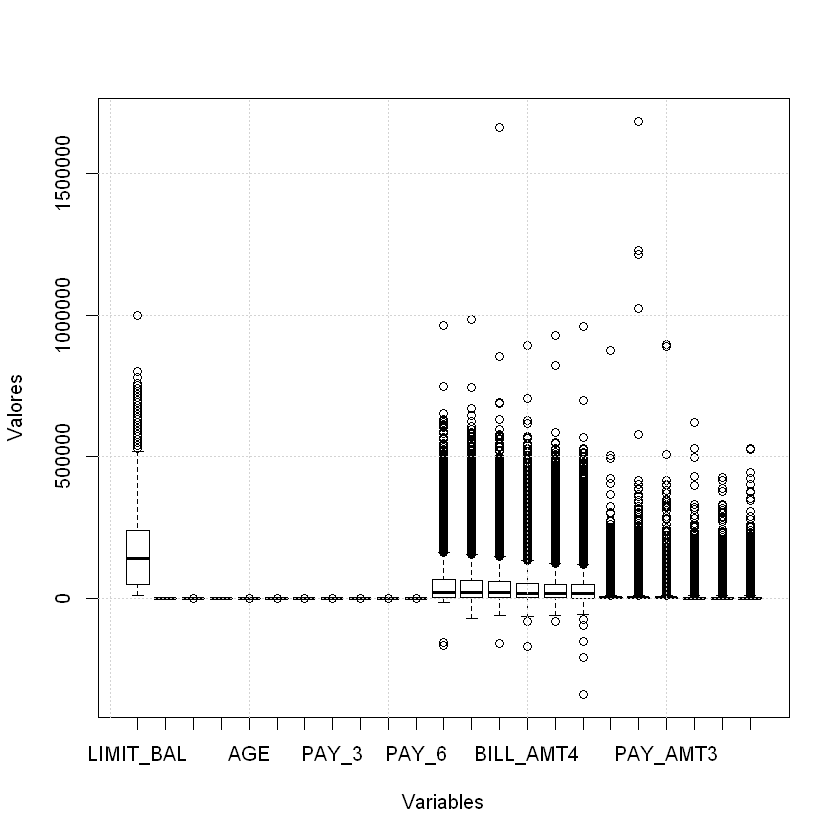

In [51]:
##
## Para las variables numéricas (todas en este
## caso) se puede construir un diagrama de
## caja y bigotes.
##
plt <- boxplot(X, 
               xlab="Variables", 
               ylab="Valores",
               srt = 90,
               horiz=FALSE)
grid()

In [52]:
##
## se define la función de normalización
##
MinMaxScaler <- 
function(x) {
    return ((x - min(x)) / (max(x) - min(x)))
}


In [53]:
str(X)

'data.frame':	30000 obs. of  23 variables:
 $ LIMIT_BAL: int  20000 120000 90000 50000 50000 50000 500000 100000 140000 20000 ...
 $ SEX      : Factor w/ 2 levels "1","2": 2 2 2 2 1 1 1 2 2 1 ...
 $ EDUCATION: Factor w/ 7 levels "0","1","2","3",..: 3 3 3 3 3 2 2 3 4 4 ...
 $ MARRIAGE : Factor w/ 4 levels "0","1","2","3": 2 3 3 2 2 3 3 3 2 3 ...
 $ AGE      : int  24 26 34 37 57 37 29 23 28 35 ...
 $ PAY_0    : Factor w/ 11 levels "-2","-1","0",..: 5 2 3 3 2 3 3 3 3 1 ...
 $ PAY_2    : Factor w/ 11 levels "-2","-1","0",..: 5 5 3 3 3 3 3 2 3 1 ...
 $ PAY_3    : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 2 3 3 2 5 1 ...
 $ PAY_4    : Factor w/ 11 levels "-2","-1","0",..: 2 3 3 3 3 3 3 3 3 1 ...
 $ PAY_5    : Factor w/ 10 levels "-2","-1","0",..: 1 3 3 3 3 3 3 3 3 2 ...
 $ PAY_6    : Factor w/ 10 levels "-2","-1","0",..: 1 4 3 3 3 3 3 2 3 2 ...
 $ BILL_AMT1: int  3913 2682 29239 46990 8617 64400 367965 11876 11285 0 ...
 $ BILL_AMT2: int  3102 1725 14027 48233 5670 57069 412023 380 1409

In [54]:
library(data.table)
library(dplyr)
cat=select(X,-c(LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6))
head(cat)

SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
2,2,1,2,2,-1,-1,-2,-2
2,2,2,-1,2,0,0,0,2
2,2,2,0,0,0,0,0,0
2,2,1,0,0,0,0,0,0
1,2,1,-1,0,-1,0,0,0
1,1,2,0,0,0,0,0,0


In [55]:
num=select(X,-c(SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6))
head(num)

LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
20000,24,3913,3102,689,0,0,0,0,689,0,0,0,0
120000,26,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
90000,34,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
50000,37,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
50000,57,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679
50000,37,64400,57069,57608,19394,19619,20024,2500,1815,657,1000,1000,800


In [56]:

##
## se aplica la función a los datos numéricos
##
num_scaled <- as.data.frame(lapply(num, MinMaxScaler))
head(num_scaled)

LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0.01010101,0.05172414,0.1499817,0.06916432,0.08672289,0.1601378,0.08064809,0.2609787,0.000000000,0.0004090820,0.0000000000,0.000000000,0.000000000,0.000000000
0.11111111,0.08620690,0.1488924,0.06785751,0.08781713,0.1632199,0.08407395,0.2634847,0.000000000,0.0005937329,0.0011160216,0.001610306,0.000000000,0.003783107
0.08080808,0.22413793,0.1723923,0.07953247,0.09378907,0.1736374,0.09547003,0.2729278,0.001737733,0.0008905994,0.0011160216,0.001610306,0.002344506,0.009457767
0.04040404,0.27586207,0.1880999,0.11199497,0.11340745,0.1868092,0.10936287,0.2836851,0.002289503,0.0011987467,0.0013392259,0.001771337,0.002506277,0.001891553
0.04040404,0.62068966,0.1541442,0.07160143,0.10601954,0.1798630,0.09963262,0.2756805,0.002289503,0.0217787169,0.0111602161,0.014492754,0.001615365,0.001284365
0.04040404,0.27586207,0.2035057,0.12038060,0.11797384,0.1784066,0.10010164,0.2763668,0.002861879,0.0010776252,0.0007332262,0.001610306,0.002344506,0.001513243


In [57]:
# Se unifica la base de datos con las variables numéricas normalizadas y las variables categóricas.

X_scaled=cbind(num_scaled,cat)
head(X_scaled)


LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_AMT6,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
0.01010101,0.05172414,0.1499817,0.06916432,0.08672289,0.1601378,0.08064809,0.2609787,0.000000000,0.0004090820,...,0.000000000,2,2,1,2,2,-1,-1,-2,-2
0.11111111,0.08620690,0.1488924,0.06785751,0.08781713,0.1632199,0.08407395,0.2634847,0.000000000,0.0005937329,...,0.003783107,2,2,2,-1,2,0,0,0,2
0.08080808,0.22413793,0.1723923,0.07953247,0.09378907,0.1736374,0.09547003,0.2729278,0.001737733,0.0008905994,...,0.009457767,2,2,2,0,0,0,0,0,0
0.04040404,0.27586207,0.1880999,0.11199497,0.11340745,0.1868092,0.10936287,0.2836851,0.002289503,0.0011987467,...,0.001891553,2,2,1,0,0,0,0,0,0
0.04040404,0.62068966,0.1541442,0.07160143,0.10601954,0.1798630,0.09963262,0.2756805,0.002289503,0.0217787169,...,0.001284365,1,2,1,-1,0,-1,0,0,0
0.04040404,0.27586207,0.2035057,0.12038060,0.11797384,0.1784066,0.10010164,0.2763668,0.002861879,0.0010776252,...,0.001513243,1,1,2,0,0,0,0,0,0


In [58]:
##
## Se crean los conjuntos de entrenamiento y prueba
##
library(caret)
muestra1 = createDataPartition(y,    # datos 
                            times = 1,   # número de particiones 
                            p = 0.7,
                          list=FALSE)     # porcentaje de los datos a usar en el entrenamiento
str(muestra1)



X_train1 <- X_scaled[muestra1, ]
X_test1 <- X_scaled[-muestra1, ]

y_train_true1 <- y[muestra1]
y_test_true1 <- y[-muestra1]



 int [1:21001, 1] 1 2 3 4 7 8 9 11 13 14 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


# Entrenamiento del modelo

In [98]:
## Se crea vector de ceros de longitud 15
c=c(rep(0,15))
c

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [99]:
## Se realiza ciclo for para k entre 1 y 15, con el fin de seleccionar, el que maximiza la tasa de éxito (Traza 
## de la matriz de confusión

for (x in 1:15) {
    
 y_test_pred1 <- knn(train = X_train1,   # conjunto de entrenamiento
                  test = X_test1,     # conjunto de prueba
                 cl = y_train_true1, # clases para el conjunto de entrenamiento
                k = x)            # número de vecinos   
    
 c[x]=table(y_test_true1, y_test_pred1)[1]+table(y_test_true1, y_test_pred1)[4]
   
    
}
    
c

[1] 6543 6543 6982 6994 7170 7197 7272 7254 7328 7313 7331 7346 7328 7329 7339

In [100]:

max(c)

#El k óptimo Corresponde a k = 12


[1] 7346

In [101]:
 ##
## carga la librería
## install.packages("class")
##
library(class)


 y_test_pred1 <- knn(train = X_train1,   # conjunto de entrenamiento
                  test = X_test1,     # conjunto de prueba
                 cl = y_train_true1, # clases para el conjunto de entrenamiento
                k = 12)            # número de vecinos 

In [102]:
##Se calcula la matrix de confusión.
table(y_test_true1, y_test_pred1)

             y_test_pred1
y_test_true1  No Incumple Incumple
  No Incumple        6599      410
  Incumple           1279      711

In [110]:
#Tasa de éxito (porcentaje de patrones clasificados correctamente):

tasa_exito=(table(y_test_true1, y_test_pred1)[1]+table(y_test_true1, y_test_pred1)[4])/(table(y_test_true1, y_test_pred1)[1]
                                                                             +table(y_test_true1, y_test_pred1)[2]
                                                                            +table(y_test_true1, y_test_pred1)[3]+
                                                                            table(y_test_true1, y_test_pred1)[4])

tasa_exito


[1] 0.8123125

In [111]:
#Error del modelo

1-tasa_exito

[1] 0.1876875

In [115]:
#Sensibilidad
sensibilidad = (table(y_test_true1, y_test_pred1)[1])/(table(y_test_true1, y_test_pred1)[1]+table(y_test_true1, y_test_pred1)[3])
sensibilidad

[1] 0.9415038

In [116]:
#Especificidad
especificidad= (table(y_test_true1, y_test_pred1)[4])/(table(y_test_true1, y_test_pred1)[2]+table(y_test_true1, y_test_pred1)[4])
especificidad



[1] 0.3572864

# 3.2 Naive Bayes

In [117]:
##
## El paquete tm se usa para minería de texto
## install.packages("tm")
## install.packages("NLP")
## install.packages("SnowballC")
##
library(NLP)
library(tm)
library(SnowballC)


Attaching package: 'NLP'

The following object is masked from 'package:ggplot2':

    annotate

Warning message:
"package 'tm' was built under R version 3.4.4"

# Entrenamiento

In [118]:
##
## Se crean los conjuntos de entrenamiento y prueba
##
library(caret)
muestra2 = createDataPartition(y,    # datos 
                            times = 1,   # número de particiones 
                            p = 0.7,
                          list=FALSE)     # porcentaje de los datos a usar en el entrenamiento
str(muestra2)



X_train2 <- X_scaled[muestra2, ]
X_test2 <- X_scaled[-muestra2, ]

y_train_true2 <- y[muestra2]
y_test_true2 <- y[-muestra2]


 int [1:21001, 1] 1 2 3 4 5 6 7 8 10 11 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


In [119]:
##
## Carga la librería
#install.packages("e1071")
##

library(e1071)
clf <- naiveBayes(X_train2, y_train_true2)

# Evaluación

In [120]:
##
## Se pronostica para los datos de prueba.
##
y_test_pred2 <- predict(clf, X_test2)
head(y_test_pred2)

[1] Incumple    No Incumple No Incumple Incumple    No Incumple Incumple   
Levels: No Incumple Incumple

In [121]:
##
## Se calcula la matriz de confusión.
##
table(y_test_true2, y_test_pred2)

             y_test_pred2
y_test_true2  No Incumple Incumple
  No Incumple        2861     4148
  Incumple            357     1633

In [125]:
#Tasa de éxito (porcentaje de patrones clasificados correctamente):

tasa_exito2=(table(y_test_true2, y_test_pred2)[1]+table(y_test_true2, y_test_pred2)[4])/(table(y_test_true2, y_test_pred2)[1]
                                                                             +table(y_test_true2, y_test_pred2)[2]
                                                                            +table(y_test_true2, y_test_pred2)[3]+
                                                                            table(y_test_true2, y_test_pred2)[4])

tasa_exito2


[1] 0.4993888

In [126]:
#Error del modelo

1-tasa_exito2

[1] 0.5006112

In [123]:
#Sensibilidad
sensibilidad2 = (table(y_test_true2, y_test_pred2)[1])/(table(y_test_true2, y_test_pred2)[1]+table(y_test_true2, y_test_pred2)[3])
sensibilidad2

[1] 0.4081895

In [124]:
#Especificidad
especificidad2= (table(y_test_true2, y_test_pred2)[4])/(table(y_test_true2, y_test_pred2)[2]+table(y_test_true2, y_test_pred2)[4])
especificidad2


[1] 0.820603

# 3.3 Árbol de decisión

# Preparación de los datos

In [127]:
##
## Se crean los conjuntos de entrenamiento y prueba
##
library(caret)
muestra3 = createDataPartition(y,    # datos 
                            times = 1,   # número de particiones 
                            p = 0.9,
                          list=FALSE)     # porcentaje de los datos a usar en el entrenamiento
str(muestra3)



X_train3 <- X_scaled[muestra3, ]
X_test3 <- X_scaled[-muestra3, ]

y_train_true3 <- y[muestra3]
y_test_true3 <- y[-muestra3]


 int [1:27001, 1] 1 2 5 6 7 8 9 10 11 12 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


In [128]:
##
## Se verifica la proporción en el  conjunto de entrenamiento
##
prop.table(table(y_train_true3))

y_train_true3
No Incumple    Incumple 
   0.778786    0.221214 

In [129]:
##
## Conjunto de prueba
##
prop.table(table(y_test_true3))

y_test_true3
No Incumple    Incumple 
  0.7789263   0.2210737 

# Entrenamiento del modelo

In [130]:
##
## Carga la librería
#install.packages("C50")
##
library(C50)

In [131]:
##
## Se usan los parámetros por defecto del algoritmo
##
arbol<- C5.0(X_train3, y_train_true3)
arbol


Call:
C5.0.default(x = X_train3, y = y_train_true3)

Classification Tree
Number of samples: 27001 
Number of predictors: 23 

Tree size: 33 

Non-standard options: attempt to group attributes


In [132]:
summary(arbol)


Call:
C5.0.default(x = X_train3, y = y_train_true3)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 10 22:09:11 2018
-------------------------------

Class specified by attribute `outcome'

Read 27001 cases (24 attributes) from undefined.data

Decision tree:

PAY_0 in {2,3,4,7,8}:
:...EDUCATION = 0: Incumple (0)
:   EDUCATION in {5,6}: No Incumple (22/5)
:   EDUCATION in {1,2,3,4}:
:   :...PAY_3 in {-2,0,1,2,3,4,5,6,7,8}: Incumple (2658/753)
:       PAY_3 = -1:
:       :...PAY_2 in {-2,1,3,4,5,6,7,8}: No Incumple (0)
:           PAY_2 = -1:
:           :...BILL_AMT1 <= 0.1494641: No Incumple (75/24)
:           :   BILL_AMT1 > 0.1494641: Incumple (5)
:           PAY_2 = 0:
:           :...PAY_AMT5 <= 0.0004689013: No Incumple (3)
:           :   PAY_AMT5 > 0.0004689013: Incumple (9/1)
:           PAY_2 = 2:
:           :...PAY_AMT4 <= 0.001711755: Incumple (18/6)
:               PAY_AMT4 > 0.001711755: No Incumple (9)
PAY_0 in {-2,-1,0,1,5,6}:
:...PAY_2 in {2,3,4,5}:
    :...PAY_6 = 7: No

# Evaluación del modelo

In [135]:
##
## Se calcula la matriz de confusión.
##
table(y_test_true3, y_test_pred3)

             y_test_pred3
y_test_true3  No Incumple Incumple
  No Incumple        2204      132
  Incumple            419      244

In [136]:
#Tasa de éxito (porcentaje de patrones clasificados correctamente):

tasa_exito3=(table(y_test_true3, y_test_pred3)[1]+table(y_test_true3, y_test_pred3)[4])/(table(y_test_true3, y_test_pred3)[1]
                                                                             +table(y_test_true3, y_test_pred3)[2]
                                                                            +table(y_test_true3, y_test_pred3)[3]+
                                                                            table(y_test_true3, y_test_pred3)[4])

tasa_exito3


[1] 0.8162721

In [137]:
#Error del modelo

1-tasa_exito3

[1] 0.1837279

In [138]:
#Sensibilidad
sensibilidad3 = (table(y_test_true3, y_test_pred3)[1])/(table(y_test_true3, y_test_pred3)[1]+table(y_test_true3, y_test_pred3)[3])
sensibilidad3

[1] 0.9434932

In [139]:
#Especificidad
especificidad3= (table(y_test_true3, y_test_pred3)[4])/(table(y_test_true3, y_test_pred3)[2]+table(y_test_true3, y_test_pred3)[4])
especificidad3


[1] 0.3680241

# Mejora del modelo

In [140]:
arbol10 <- C5.0(X_train3, 
              y_train_true3,
              trials = 10)    # cantidad de árboles a considerar

arbol10


Call:
C5.0.default(x = X_train3, y = y_train_true3, trials = 10)

Classification Tree
Number of samples: 27001 
Number of predictors: 23 

Number of boosting iterations: 10 
Average tree size: 22.8 

Non-standard options: attempt to group attributes


In [141]:
## imprime todos los arboles
summary(arbol10)


Call:
C5.0.default(x = X_train3, y = y_train_true3, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Apr 10 22:16:50 2018
-------------------------------

Class specified by attribute `outcome'

Read 27001 cases (24 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

PAY_0 in {2,3,4,7,8}:
:...EDUCATION = 0: Incumple (0)
:   EDUCATION in {5,6}: No Incumple (22/5)
:   EDUCATION in {1,2,3,4}:
:   :...PAY_3 in {-2,0,1,2,3,4,5,6,7,8}: Incumple (2658/753)
:       PAY_3 = -1:
:       :...PAY_2 in {-2,1,3,4,5,6,7,8}: No Incumple (0)
:           PAY_2 = -1:
:           :...BILL_AMT1 <= 0.1494641: No Incumple (75/24)
:           :   BILL_AMT1 > 0.1494641: Incumple (5)
:           PAY_2 = 0:
:           :...PAY_AMT5 <= 0.0004689013: No Incumple (3)
:           :   PAY_AMT5 > 0.0004689013: Incumple (9/1)
:           PAY_2 = 2:
:           :...PAY_AMT4 <= 0.001711755: Incumple (18/6)
:               PAY_AMT4 > 0.001711755: No Incumple (9)
PAY_0 in {-2,-1,0,1,5,6}:
:...PAY_

In [142]:
y_test_pred10 <- predict(arbol10, X_test3)

CrossTable(y_test_true3, 
           y_test_pred10,
           prop.chisq = FALSE, 
           prop.c = FALSE, 
           prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  2999 

 
               | predicted default 
actual default | No Incumple |    Incumple |   Row Total | 
---------------|-------------|-------------|-------------|
   No Incumple |        2225 |         111 |        2336 | 
               |       0.742 |       0.037 |             | 
---------------|-------------|-------------|-------------|
      Incumple |         448 |         215 |         663 | 
               |       0.149 |       0.072 |             | 
---------------|-------------|-------------|-------------|
  Column Total |        2673 |         326 |        2999 | 
---------------|-------------|-------------|-------------|

 


In [143]:
#Tasa de éxito (porcentaje de patrones clasificados correctamente):

tasa_exito3a=(table(y_test_true3, y_test_pred10)[1]+table(y_test_true3, y_test_pred10)[4])/(table(y_test_true3, y_test_pred10)[1]
                                                                             +table(y_test_true3, y_test_pred10)[2]
                                                                            +table(y_test_true3, y_test_pred10)[3]+
                                                                            table(y_test_true3, y_test_pred10)[4])

tasa_exito3a

[1] 0.8136045

In [144]:
## Error

1-tasa_exito3a

[1] 0.1863955

In [145]:
#Sensibilidad
sensibilidad3a = (table(y_test_true3, y_test_pred10)[1])/(table(y_test_true3, y_test_pred10)[1]+table(y_test_true3, y_test_pred10)[3])
sensibilidad3a

[1] 0.9524829

In [146]:
#Especificidad
especificidad3a= (table(y_test_true3, y_test_pred10)[4])/(table(y_test_true3, y_test_pred10)[2]+table(y_test_true3, y_test_pred10)[4])
especificidad3a


[1] 0.3242836

In [ ]:
#No se observa mejora de la tasa de éxito, se deja el modelo inicial.

# 3.4 Metodología OneR

In [147]:
##
## Carga la librería.
#install.packages("OneR")
##
library(OneR)
modelo4 <- OneR(y ~ ., data = X_scaled, verbose = TRUE)
modelo4

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute Accuracy
1 * PAY_0     81.96%  
2   PAY_2     79.66%  
3   PAY_5     78.98%  
4   PAY_4     78.71%  
5   PAY_3     78.52%  
6   PAY_6     78.36%  
7   LIMIT_BAL 77.88%  
7   AGE       77.88%  
7   BILL_AMT1 77.88%  
7   BILL_AMT2 77.88%  
7   BILL_AMT3 77.88%  
7   BILL_AMT4 77.88%  
7   BILL_AMT5 77.88%  
7   BILL_AMT6 77.88%  
7   PAY_AMT1  77.88%  
7   PAY_AMT2  77.88%  
7   PAY_AMT3  77.88%  
7   PAY_AMT4  77.88%  
7   PAY_AMT5  77.88%  
7   PAY_AMT6  77.88%  
7   SEX       77.88%  
7   EDUCATION 77.88%  
7   MARRIAGE  77.88%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = y ~ ., data = X_scaled, verbose = TRUE)

Rules:
If PAY_0 = -2 then y = No Incumple
If PAY_0 = -1 then y = No Incumple
If PAY_0 = 0  then y = No Incumple
If PAY_0 = 1  then y = No Incumple
If PAY_0 = 2  then y = Incumple
If PAY_0 = 3  then y = Incumple
If PAY_0 = 4  then y = Incumple
If PAY_0 = 5  then y = No Incumple
If PAY_0 = 6  then y = Incumple
If PAY_0 = 7  then y = Incumple
If PAY_0 = 8  then y = Incumple

Accuracy:
24588 of 30000 instances classified correctly (81.96%)


# Evaluación del Modelo

In [148]:
summary(modelo4)


Call:
OneR.formula(formula = y ~ ., data = X_scaled, verbose = TRUE)

Rules:
If PAY_0 = -2 then y = No Incumple
If PAY_0 = -1 then y = No Incumple
If PAY_0 = 0  then y = No Incumple
If PAY_0 = 1  then y = No Incumple
If PAY_0 = 2  then y = Incumple
If PAY_0 = 3  then y = Incumple
If PAY_0 = 4  then y = Incumple
If PAY_0 = 5  then y = No Incumple
If PAY_0 = 6  then y = Incumple
If PAY_0 = 7  then y = Incumple
If PAY_0 = 8  then y = Incumple

Accuracy:
24588 of 30000 instances classified correctly (81.96%)

Contingency table:
             PAY_0
y                 -2     -1       0      1      2     3    4    5   6   7    8
  No Incumple * 2394 * 4732 * 12849 * 2436    823    78   24 * 13   5   2    8
  Incumple       365    954    1888   1252 * 1844 * 244 * 52   13 * 6 * 7 * 11
  Sum           2759   5686   14737   3688   2667   322   76   26  11   9   19
             PAY_0
y               Sum
  No Incumple 23364
  Incumple     6636
  Sum         30000
---
Maximum in each column: '*'

Pe

# Cross _ Validation

In [149]:
##
## Se crean los conjuntos de entrenamiento y prueba
##
library(caret)
muestra4 = createDataPartition(y,    # datos 
                            times = 1,   # número de particiones 
                            p = 0.9,
                          list=FALSE)     # porcentaje de los datos a usar en el entrenamiento
str(muestra4)



X_train4 <- X_scaled[muestra4, ]
X_test4 <- X_scaled[-muestra4, ]

y_train_true4 <- y[muestra4]
y_test_true4 <- y[-muestra4]

 int [1:27001, 1] 1 3 4 5 6 7 8 9 11 12 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr "Resample1"


In [150]:
##
## Se verifica la proporción en el  conjunto de entrenamiento
##
prop.table(table(y_train_true4))

y_train_true4
No Incumple    Incumple 
   0.778786    0.221214 

In [152]:
##
## Conjunto de prueba
##
prop.table(table(y_test_true4))

y_test_true4
No Incumple    Incumple 
  0.7789263   0.2210737 

In [153]:
#Modelo con los datos de prueba

modelOneR <- OneR(y_train_true4 ~ ., data = X_train4, verbose = TRUE)
modelOneR

Warning message in OneR.data.frame(x = data, ties.method = ties.method, verbose = verbose, :
"data contains unused factor levels"


    Attribute Accuracy
1 * PAY_0     82.01%  
2   PAY_2     79.67%  
3   PAY_5     79%     
4   PAY_4     78.67%  
5   PAY_3     78.54%  
6   PAY_6     78.29%  
7   LIMIT_BAL 77.88%  
7   AGE       77.88%  
7   BILL_AMT1 77.88%  
7   BILL_AMT2 77.88%  
7   BILL_AMT3 77.88%  
7   BILL_AMT4 77.88%  
7   BILL_AMT5 77.88%  
7   BILL_AMT6 77.88%  
7   PAY_AMT1  77.88%  
7   PAY_AMT2  77.88%  
7   PAY_AMT3  77.88%  
7   PAY_AMT4  77.88%  
7   PAY_AMT5  77.88%  
7   PAY_AMT6  77.88%  
7   SEX       77.88%  
7   EDUCATION 77.88%  
7   MARRIAGE  77.88%  
---
Chosen attribute due to accuracy
and ties method (if applicable): '*'




Call:
OneR.formula(formula = y_train_true4 ~ ., data = X_train4, verbose = TRUE)

Rules:
If PAY_0 = -2 then y_train_true4 = No Incumple
If PAY_0 = -1 then y_train_true4 = No Incumple
If PAY_0 = 0  then y_train_true4 = No Incumple
If PAY_0 = 1  then y_train_true4 = No Incumple
If PAY_0 = 2  then y_train_true4 = Incumple
If PAY_0 = 3  then y_train_true4 = Incumple
If PAY_0 = 4  then y_train_true4 = Incumple
If PAY_0 = 5  then y_train_true4 = No Incumple
If PAY_0 = 6  then y_train_true4 = No Incumple
If PAY_0 = 7  then y_train_true4 = Incumple
If PAY_0 = 8  then y_train_true4 = Incumple

Accuracy:
22144 of 27001 instances classified correctly (82.01%)


# Evaluación del modelo

In [154]:
##
## Se evaluar el modelo con los datos de prueba
## install.packages("gmodels")
##
#library(gmodels)
y_test_pred4<- predict(modelOneR, X_test4)


In [157]:
##Se crea matriz de confusión
table(y_test_true4,y_test_pred4)

             y_test_pred4
y_test_true4  Incumple No Incumple
  No Incumple      106        2230
  Incumple         213         450

In [158]:
#Tasa de éxito (porcentaje de patrones clasificados correctamente):

tasa_exito4=(table(y_test_true4, y_test_pred4)[2]+table(y_test_true4, y_test_pred4)[3])/(table(y_test_true4, y_test_pred4)[1]
                                                                             +table(y_test_true4, y_test_pred4)[2]
                                                                            +table(y_test_true4, y_test_pred4)[3]+
                                                                            table(y_test_true4, y_test_pred4)[4])

tasa_exito4

[1] 0.8146049

In [11]:
#Error 

1-0.81460486828943

[1] 0.1853951

In [159]:
#Sensibilidad
sensibilidad4 = (table(y_test_true4, y_test_pred4)[3])/(table(y_test_true4, y_test_pred4)[1]+table(y_test_true4, y_test_pred4)[3])
sensibilidad4

[1] 0.9546233

In [160]:
#Especificidad
especificidad4= (table(y_test_true4, y_test_pred4)[2])/(table(y_test_true4, y_test_pred4)[2]+table(y_test_true4, y_test_pred4)[4])
especificidad4


[1] 0.321267

# 4. Análisis de los resultados y conclusiones

Luego de realizar la aplicación de las 4 técnicas de clasificación para la base de datos, se procederá a hacer la comparación de las medidas de precisión, dadas por la matriz de confusión, estas son: Tasa de Éxito, Error, Sensibilidad y Especificidad.

| Técnica              | Tasa de Éxito | Error | Sensibilidad | Especificidad |
| :------- | :------: | -----: | -----: | -----: | 
| Vecinos más cercanos | 81.23 % | 18.76 % | 94.15 % | 35.72 % |
| Naive Bayes | 49.93 % | 50.06 % | 40.82 % | 82.06 % |
| Árbol de decisión | 81.63 % | 18.37 % | 94.35 % | 36.80 % |
| OneR | 81.46 % | 18.54 % | 95.46 % | 32.13 % |

Las técnicas consideradas arrojan medidas similares, excepto Naive Bayes, la mayor tasa de éxito, está dada para el Árbol de decisión, por tanto también el error es mínimo.

En términos de sensibilidad, es decir proporción de personas que no incumplen con el pago,  el mayor porcentaje lo da la Metodología OneR, con 95.46 %. Sin embargo, al analizar especificidad, es decir, proporción de personas que incumplen con el pago, el mayor porcentaje lo da el Árbol de Decisión, con 36.80 %. 

En este caso, sería más importante tener una buena clasificación de las personas que incumplen con el pago, dado que al realizar el pronóstico de una futura base de datos, se podrían implementar estrategias con estos usuarios, para "Evitar" el no pago de la obligación.

Se selecciona el modelo de ÁRBOL DE DECISIÓN, como el que mejor clasifica la variable de interés, entre los modelos considerados.

Como conclusión final, el análisis de sensibilidad y especificidad, depende de la definición del experto que está interesado en el análisis de la base de datos.
